In [25]:
import pandas as pd
import math

In [26]:
dados = pd.read_csv('tabela_final_ecommerce.csv')

In [27]:
dados.columns

Index(['Unnamed: 0', 'order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'total_produto_frete',
       'cod_pedido', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_type', 'payment_value', 'review_id', 'review_score',
       'review_creation_date', 'product_category_name', 'product_photos_qty',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'cod_produto', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'cod_vendedor', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'cod_cliente'],
      dtype='object')

In [28]:
colunas = ['cod_pedido', 'cod_produto', 'product_category_name','product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'cod_vendedor', 'cod_cliente', 'order_status', 'price', 'freight_value', 'payment_type', 'payment_value', 'customer_city', 'customer_state', 'seller_city', 'seller_state','order_purchase_timestamp' ,'shipping_limit_date', 'order_estimated_delivery_date', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'review_score']
dados_selecionados = dados[colunas]

In [29]:
dados_selecionados.columns

Index(['cod_pedido', 'cod_produto', 'product_category_name',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'cod_vendedor', 'cod_cliente',
       'order_status', 'price', 'freight_value', 'payment_type',
       'payment_value', 'customer_city', 'customer_state', 'seller_city',
       'seller_state', 'order_purchase_timestamp', 'shipping_limit_date',
       'order_estimated_delivery_date', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'review_score'],
      dtype='object')

In [30]:
labels = {'cod_pedido' : 'codigo_pedido' , 'cod_produto': 'codigo_produto', 'product_category_name' : 'nome_categoria_produto',
       'product_photos_qty' : 'quantidade_fotos_anuncio', 'product_weight_g' : 'peso_produto_gramas' , 'product_length_cm' : 'comprimento_produto_cm',
       'product_height_cm': 'altura_produto_cm', 'product_width_cm' : 'largura_produto_cm', 'cod_vendedor': 'codigo_vendedor', 'cod_cliente': 'codigo_cliente',
       'order_status' : 'status_pedido', 'price' : 'preco', 'freight_value' : 'valor_frete', 'payment_type' : 'tipo_pagamento',
       'payment_value' : 'valor_total_pagamento', 'customer_city' : 'cidade_cliente', 'customer_state' : 'estado_cliente', 'seller_city' : 'cidade_vendedor',
       'seller_state' : 'estado_vendedor', 'shipping_limit_date' : 'data_limite_envio', 'order_estimated_delivery_date' : 'data_estimada_entrega',
       'order_delivered_carrier_date' : 'data_estimada_envio','order_delivered_customer_date' : 'data_entrega_cliente',
       'review_score' : 'nota_cliente'}

In [31]:
dados_selecionados = dados_selecionados.rename(columns=labels)
nomes = pd.read_csv('data base/product_category_name_translation.csv')
nomes_br = nomes.product_category_name.unique()
nomes_english = nomes.product_category_name_english.unique()
nomes_completos = {}

for en, br in zip(nomes_english, nomes_br):
    nomes_completos[en] = br
    
dados_selecionados['nome_categoria_produto'].map(nomes_completos)
status = {'delivered' : 'entregue', 'shipped' : 'enviado', 'invoiced' : 'faturado', 'canceled' : 'cancelado', 'processing' : 'processando',
       'unavailable' : 'indisponível', 'approved' : 'aprovado', 'created': 'criado'}
dados_selecionados['status_pedido'].map(status)

0             entregue
1             entregue
2             entregue
3             entregue
4             entregue
              ...     
119146    indisponível
119147       cancelado
119148       cancelado
119149    indisponível
119150    indisponível
Name: status_pedido, Length: 119151, dtype: object

In [32]:
dados_selecionados

,codigo_pedido,codigo_produto,nome_categoria_produto,quantidade_fotos_anuncio,peso_produto_gramas,comprimento_produto_cm,altura_produto_cm,largura_produto_cm,codigo_vendedor,codigo_cliente,...,cidade_cliente,estado_cliente,cidade_vendedor,estado_vendedor,order_purchase_timestamp,data_limite_envio,data_estimada_entrega,data_estimada_envio,data_entrega_cliente,nota_cliente
0,PED0,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,CLIENTE65557,...,campos dos goytacazes,RJ,volta redonda,SP,2017-09-13 08:59:02,2017-09-19 09:45:35,2017-09-29 00:00:00,2017-09-19 18:34:16,2017-09-20 23:43:48,5
1,PED7352,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,CLIENTE80988,...,jatai,GO,volta redonda,SP,2017-06-28 11:52:20,2017-07-05 02:44:11,2017-07-26 00:00:00,2017-07-05 12:00:33,2017-07-13 20:39:29,5
2,PED32057,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,CLIENTE25492,...,belo horizonte,MG,volta redonda,SP,2018-05-18 10:25:53,2018-05-23 10:56:25,2018-06-07 00:00:00,2018-05-23 14:05:00,2018-06-04 18:34:26,4
3,PED42988,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,CLIENTE22915,...,sao jose dos pinhais,PR,volta redonda,SP,2017-08-01 18:38:42,2017-08-07 18:55:08,2017-08-25 00:00:00,2017-08-02 19:07:36,2017-08-09 21:26:33,5
4,PED48148,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,CLIENTE2591,...,conselheiro lafaiete,MG,volta redonda,SP,2017-08-10 21:48:40,2017-08-16 22:05:11,2017-09-01 00:00:00,2017-08-11 19:43:07,2017-08-24 20:04:21,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLIENTE24152,...,guarulhos,SP,NaN,NaN,2018-01-16 14:27:59,NaN,2018-02-06 00:00:00,NaN,NaN,1
119147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLIENTE93287,...,santos,SP,NaN,NaN,2018-08-31 16:13:44,NaN,2018-10-01 00:00:00,NaN,NaN,5
119148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLIENTE55235,...,sao paulo,SP,NaN,NaN,2018-09-06 18:45:47,NaN,2018-09-27 00:00:00,NaN,NaN,4
119149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLIENTE51641,...,rio de janeiro,RJ,NaN,NaN,2017-08-23 16:28:04,NaN,2017-09-15 00:00:00,NaN,NaN,1


In [33]:
# top 10 mais vendidos por categorias
dados_selecionados['nome_categoria_produto'].value_counts().to_frame().head(10)

,count
nome_categoria_produto,
cama_mesa_banho,11990
beleza_saude,10033
esporte_lazer,9005
moveis_decoracao,8833
informatica_acessorios,8151
utilidades_domesticas,7380
relogios_presentes,6213
telefonia,4726
ferramentas_jardim,4590


In [34]:
# top 10 menos vendidos por categorias
dados_selecionados['nome_categoria_produto'].value_counts().to_frame().tail(10)

,count
nome_categoria_produto,
flores,33
fashion_esporte,31
casa_conforto_2,31
artes_e_artesanato,24
la_cuisine,16
portateis_cozinha_e_preparadores_de_alimentos,15
cds_dvds_musicais,14
pc_gamer,10
fashion_roupa_infanto_juvenil,8


In [35]:
# top 10 vendedores com mais vendas
dados_selecionados['codigo_vendedor'].value_counts().to_frame().head(10)

,count
codigo_vendedor,
VEND2463,2155
VEND797,2130
VEND474,2017
VEND1413,1893
VEND1873,1662
VEND390,1530
VEND2720,1477
VEND1182,1463
VEND2207,1245


In [36]:
# Contagem dos status
dados_selecionados['status_pedido'].value_counts().to_frame()

,count
status_pedido,
delivered,115731
shipped,1256
canceled,750
unavailable,652
invoiced,378
processing,376
created,5
approved,3


In [37]:
dados_selecionados

,codigo_pedido,codigo_produto,nome_categoria_produto,quantidade_fotos_anuncio,peso_produto_gramas,comprimento_produto_cm,altura_produto_cm,largura_produto_cm,codigo_vendedor,codigo_cliente,...,cidade_cliente,estado_cliente,cidade_vendedor,estado_vendedor,order_purchase_timestamp,data_limite_envio,data_estimada_entrega,data_estimada_envio,data_entrega_cliente,nota_cliente
0,PED0,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,CLIENTE65557,...,campos dos goytacazes,RJ,volta redonda,SP,2017-09-13 08:59:02,2017-09-19 09:45:35,2017-09-29 00:00:00,2017-09-19 18:34:16,2017-09-20 23:43:48,5
1,PED7352,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,CLIENTE80988,...,jatai,GO,volta redonda,SP,2017-06-28 11:52:20,2017-07-05 02:44:11,2017-07-26 00:00:00,2017-07-05 12:00:33,2017-07-13 20:39:29,5
2,PED32057,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,CLIENTE25492,...,belo horizonte,MG,volta redonda,SP,2018-05-18 10:25:53,2018-05-23 10:56:25,2018-06-07 00:00:00,2018-05-23 14:05:00,2018-06-04 18:34:26,4
3,PED42988,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,CLIENTE22915,...,sao jose dos pinhais,PR,volta redonda,SP,2017-08-01 18:38:42,2017-08-07 18:55:08,2017-08-25 00:00:00,2017-08-02 19:07:36,2017-08-09 21:26:33,5
4,PED48148,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,CLIENTE2591,...,conselheiro lafaiete,MG,volta redonda,SP,2017-08-10 21:48:40,2017-08-16 22:05:11,2017-09-01 00:00:00,2017-08-11 19:43:07,2017-08-24 20:04:21,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLIENTE24152,...,guarulhos,SP,NaN,NaN,2018-01-16 14:27:59,NaN,2018-02-06 00:00:00,NaN,NaN,1
119147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLIENTE93287,...,santos,SP,NaN,NaN,2018-08-31 16:13:44,NaN,2018-10-01 00:00:00,NaN,NaN,5
119148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLIENTE55235,...,sao paulo,SP,NaN,NaN,2018-09-06 18:45:47,NaN,2018-09-27 00:00:00,NaN,NaN,4
119149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLIENTE51641,...,rio de janeiro,RJ,NaN,NaN,2017-08-23 16:28:04,NaN,2017-09-15 00:00:00,NaN,NaN,1


In [38]:
dados_selecionados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119151 entries, 0 to 119150
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   codigo_pedido             118318 non-null  object 
 1   codigo_produto            118318 non-null  object 
 2   nome_categoria_produto    118318 non-null  object 
 3   quantidade_fotos_anuncio  118318 non-null  float64
 4   peso_produto_gramas       118318 non-null  float64
 5   comprimento_produto_cm    118318 non-null  float64
 6   altura_produto_cm         118318 non-null  float64
 7   largura_produto_cm        118318 non-null  float64
 8   codigo_vendedor           118318 non-null  object 
 9   codigo_cliente            119151 non-null  object 
 10  status_pedido             119151 non-null  object 
 11  preco                     118318 non-null  float64
 12  valor_frete               118318 non-null  float64
 13  tipo_pagamento            119148 non-null  o

In [39]:
dados_selecionados.loc[:, 'order_purchase_timestamp'] = pd.to_datetime(dados_selecionados['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')

<h1 style='color:green'>O que falta:</h1>
<ul style='color:green'>
    <li><s>Tratar os NaN que estão discrepantes.</s></li>
    <li>Fazer a nova coluna de horário e data da compra.</li>
    <li>Fazer o gropby dos pedidos idênticos, mas de produtos diferentes.</li>
    <li>Tratar as colunas de data.</li>
    <li>Perguntas de casos</li>

</ul>

<h3 style='color:green'>Perguntas de caso: </h3>
<ol style='color:green'>
    <li>Horário de pico de pedidos no site.</li>
    <li>Média de tempo de entrega entre estados. *</li>
    <li>Relação do frete com a distância e dimensões.</li>
    <li>Item mais vendido.</li>
    <li>Categoria do item mais vendido.</li>
    <li>Análise das datas comemorativas, tem mais vendas (mês mas vendas, ano com mais vendas)?</li>
    <li>Top 10 melhores vendedores, suas localidades e categoria.</li>
    <li>Quais as regiões com mais compras na região Sul.</li>
    <li>Categorias, produtos e vendedores com as maiores notas.</li>
    <li>Possíveis causas dos cancelamentos e sua porcentagem no total de pedidos.</li>
    <li>Análise do melhor comprador (items comprados e valor).</li>
    <li>Fazer categorias para os melhores compradores.</li>
    <li>Encontrar bons compradores mas que compram pouco, para oferecer vantagens.</li>
    <li>Fazer uma análise das formas de pagamento. As mais utilizadas.</li>
    <li>Média de ganho mensal do melhor vendedor.</li>
    
</ol>

In [40]:
dados_selecionados['codigo_pedido'].nunique()

98666

In [41]:
dados_selecionados = dados_selecionados.dropna(subset=['codigo_produto'])

<h2 style='color:green'>Tratamento NaN</h2>

In [42]:
dados_selecionados

,codigo_pedido,codigo_produto,nome_categoria_produto,quantidade_fotos_anuncio,peso_produto_gramas,comprimento_produto_cm,altura_produto_cm,largura_produto_cm,codigo_vendedor,codigo_cliente,...,cidade_cliente,estado_cliente,cidade_vendedor,estado_vendedor,order_purchase_timestamp,data_limite_envio,data_estimada_entrega,data_estimada_envio,data_entrega_cliente,nota_cliente
0,PED0,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,CLIENTE65557,...,campos dos goytacazes,RJ,volta redonda,SP,2017-09-13 08:59:02,2017-09-19 09:45:35,2017-09-29 00:00:00,2017-09-19 18:34:16,2017-09-20 23:43:48,5
1,PED7352,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,CLIENTE80988,...,jatai,GO,volta redonda,SP,2017-06-28 11:52:20,2017-07-05 02:44:11,2017-07-26 00:00:00,2017-07-05 12:00:33,2017-07-13 20:39:29,5
2,PED32057,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,CLIENTE25492,...,belo horizonte,MG,volta redonda,SP,2018-05-18 10:25:53,2018-05-23 10:56:25,2018-06-07 00:00:00,2018-05-23 14:05:00,2018-06-04 18:34:26,4
3,PED42988,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,CLIENTE22915,...,sao jose dos pinhais,PR,volta redonda,SP,2017-08-01 18:38:42,2017-08-07 18:55:08,2017-08-25 00:00:00,2017-08-02 19:07:36,2017-08-09 21:26:33,5
4,PED48148,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,CLIENTE2591,...,conselheiro lafaiete,MG,volta redonda,SP,2017-08-10 21:48:40,2017-08-16 22:05:11,2017-09-01 00:00:00,2017-08-11 19:43:07,2017-08-24 20:04:21,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118313,PED97807,PROD12741,moveis_decoracao,2.0,1000.0,69.0,11.0,11.0,VEND1817,CLIENTE65859,...,rio de janeiro,RJ,curitiba,PR,2017-04-19 10:20:51,2017-04-27 05:10:28,2017-05-22 00:00:00,2017-05-04 15:06:24,2017-05-24 10:52:43,4
118314,PED98085,PROD9858,eletronicos,3.0,500.0,17.0,9.0,25.0,VEND2705,CLIENTE45692,...,limeira,SP,curitiba,PR,2017-08-11 10:15:22,2017-08-17 02:55:27,2017-09-04 00:00:00,2017-08-14 22:03:19,2017-08-17 17:47:55,4
118315,PED98298,PROD21768,pcs,4.0,5660.0,54.0,18.0,47.0,VEND2916,CLIENTE21171,...,vitoria,ES,londrina,PR,2018-07-25 18:10:17,2018-08-02 04:05:13,2018-08-10 00:00:00,2018-08-03 14:42:00,2018-08-15 14:57:50,1
118316,PED98461,PROD10190,bebidas,1.0,2000.0,19.0,38.0,19.0,VEND2507,CLIENTE51136,...,cacapava,SP,sao paulo,SP,2018-04-12 19:47:40,2018-04-18 20:10:33,2018-04-30 00:00:00,2018-04-18 00:41:29,2018-04-20 17:48:39,5


<h2> Criando df com a hora data estimada e a data de recebimento </h2>

In [43]:
pd.set_option('mode.chained_assignment', None)  # desativa o copywarnning
dados_selecionados['order_purchase_timestamp'] = pd.to_datetime(dados_selecionados['order_purchase_timestamp'])
dia_hora_compra = pd.DataFrame({'Data': dados_selecionados['order_purchase_timestamp'].dt.date,'Hora': dados_selecionados['order_purchase_timestamp'].dt.time})
dia_hora_compra['Data'] = pd.to_datetime(dia_hora_compra['Data'])
dia_hora_compra['Hora'] = pd.to_datetime(dia_hora_compra['Hora'], format='%H:%M:%S')

In [44]:
dados_selecionados['data_estimada_entrega'] = pd.to_datetime(dados_selecionados['data_estimada_entrega'])
dados_selecionados['data_entrega_cliente'] = pd.to_datetime(dados_selecionados['data_entrega_cliente'])

In [45]:
dia_entregas_recebimentos = pd.DataFrame()
dia_entregas_recebimentos['data_estimada_entrega'] = dados_selecionados['data_estimada_entrega'].dt.date
dia_entregas_recebimentos['data_entrega_cliente'] = dados_selecionados['data_entrega_cliente'].dt.date
dia_entregas_recebimentos['data_compra'] = dia_hora_compra['Data']
dia_entregas_recebimentos['data_estimada_entrega'] = pd.to_datetime(dia_entregas_recebimentos['data_estimada_entrega'])
dia_entregas_recebimentos['data_entrega_cliente'] = pd.to_datetime(dia_entregas_recebimentos['data_entrega_cliente'])

In [46]:
dia_entregas_recebimentos

,data_estimada_entrega,data_entrega_cliente,data_compra
0,2017-09-29,2017-09-20,2017-09-13
1,2017-07-26,2017-07-13,2017-06-28
2,2018-06-07,2018-06-04,2018-05-18
3,2017-08-25,2017-08-09,2017-08-01
4,2017-09-01,2017-08-24,2017-08-10
...,...,...,...
118313,2017-05-22,2017-05-24,2017-04-19
118314,2017-09-04,2017-08-17,2017-08-11
118315,2018-08-10,2018-08-15,2018-07-25
118316,2018-04-30,2018-04-20,2018-04-12


In [47]:
dia_entregas_recebimentos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118318 entries, 0 to 118317
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   data_estimada_entrega  118318 non-null  datetime64[ns]
 1   data_entrega_cliente   115730 non-null  datetime64[ns]
 2   data_compra            118318 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 3.6 MB


In [48]:
dia_hora_compra

,Data,Hora
0,2017-09-13,1900-01-01 08:59:02
1,2017-06-28,1900-01-01 11:52:20
2,2018-05-18,1900-01-01 10:25:53
3,2017-08-01,1900-01-01 18:38:42
4,2017-08-10,1900-01-01 21:48:40
...,...,...
118313,2017-04-19,1900-01-01 10:20:51
118314,2017-08-11,1900-01-01 10:15:22
118315,2018-07-25,1900-01-01 18:10:17
118316,2018-04-12,1900-01-01 19:47:40


<h2> Pergunta 1 </h2>

In [49]:
colunas = ['cod_pedido', 'cod_produto', 'product_category_name','product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'cod_vendedor', 'cod_cliente', 'order_status', 'price', 'freight_value', 'payment_type', 'payment_value', 'customer_city', 'customer_state', 'seller_city', 'seller_state','order_purchase_timestamp' ,'shipping_limit_date', 'order_estimated_delivery_date', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'review_score']
dados_selecionados_1 = dados[colunas]
data_compra = dados_selecionados_1['order_purchase_timestamp']
horario_compra = []
for i in range(0, len(data_compra)):
    horario_compra.append(data_compra[i][11:])

In [50]:
lista_horas = []
for h in range(0, len(horario_compra)):
    lista_horas.append(horario_compra[h][:2])

In [51]:
import numpy as np
x = np.array(lista_horas)
x = x.astype(int)
unique, counts = np.unique(x, return_counts=True)
unique

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [52]:
frequencia_horas = pd.DataFrame({'Hora': unique, 'Frequência' : counts })
frequencia_horas

,Hora,Frequência
0,0,2934
1,1,1377
2,2,616
3,3,328
4,4,256
5,5,226
6,6,575
7,7,1435
8,8,3547
9,9,5723


In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [54]:
maximo = frequencia_horas['Frequência'].max()
grade_y = np.arange(start=0, stop=8500, step=1000)
grade_x = np.arange(start=0, stop=24, step=2)

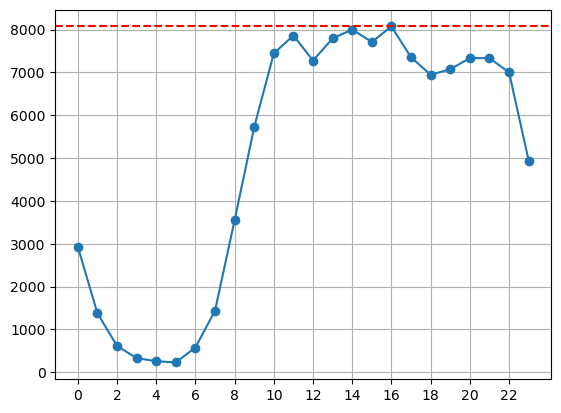

In [55]:
x = frequencia_horas['Hora']
y = frequencia_horas['Frequência']

# Create a line plot
plt.plot(x, y, marker='o')
plt.axhline(y=maximo, color='r', linestyle='--', label=f'Pico das vendas: {maximo}')
plt.grid(True)
plt.yticks(grade_y)
plt.xticks(grade_x)
plt.show()

<h2> Pergunta 2 </h2>

In [56]:
dia_entregas_recebimentos['estado_cliente'] = dados_selecionados['estado_cliente']
dia_entregas_recebimentos['estado_vendedor'] = dados_selecionados['estado_vendedor']

In [57]:
dia_entregas_recebimentos

,data_estimada_entrega,data_entrega_cliente,data_compra,estado_cliente,estado_vendedor
0,2017-09-29,2017-09-20,2017-09-13,RJ,SP
1,2017-07-26,2017-07-13,2017-06-28,GO,SP
2,2018-06-07,2018-06-04,2018-05-18,MG,SP
3,2017-08-25,2017-08-09,2017-08-01,PR,SP
4,2017-09-01,2017-08-24,2017-08-10,MG,SP
...,...,...,...,...,...
118313,2017-05-22,2017-05-24,2017-04-19,RJ,PR
118314,2017-09-04,2017-08-17,2017-08-11,SP,PR
118315,2018-08-10,2018-08-15,2018-07-25,ES,PR
118316,2018-04-30,2018-04-20,2018-04-12,SP,SP


In [58]:
dia_entregas_recebimentos['diferenca_dias'] = (dia_entregas_recebimentos['data_entrega_cliente'] - dia_entregas_recebimentos['data_compra']).dt.days

In [59]:
entrega = dia_entregas_recebimentos.groupby('estado_vendedor')['diferenca_dias']
entrega.mean()

estado_vendedor
AC          NaN
AM    48.000000
BA    13.784141
CE    17.444444
DF    12.509657
ES    12.772251
GO    12.715084
MA    17.675676
MG    12.830781
MS    12.416667
MT    14.671233
PA    13.250000
PB    11.627907
PE    12.787879
PI    13.727273
PR    13.293568
RJ    11.877347
RN    12.928571
RO    17.428571
RS    11.533599
SC    13.415355
SE    12.600000
SP    12.241568
Name: diferenca_dias, dtype: float64

In [60]:
filtro_sp = dia_entregas_recebimentos.loc[dia_entregas_recebimentos['estado_vendedor'] == 'SP']

In [61]:
filtro_sp

,data_estimada_entrega,data_entrega_cliente,data_compra,estado_cliente,estado_vendedor,diferenca_dias
0,2017-09-29,2017-09-20,2017-09-13,RJ,SP,7.0
1,2017-07-26,2017-07-13,2017-06-28,GO,SP,15.0
2,2018-06-07,2018-06-04,2018-05-18,MG,SP,17.0
3,2017-08-25,2017-08-09,2017-08-01,PR,SP,8.0
4,2017-09-01,2017-08-24,2017-08-10,MG,SP,14.0
...,...,...,...,...,...,...
118309,2017-09-21,2017-09-14,2017-09-03,RJ,SP,11.0
118311,2018-08-16,2018-08-16,2018-07-26,BA,SP,21.0
118312,2018-08-16,2018-08-16,2018-07-26,BA,SP,21.0
118316,2018-04-30,2018-04-20,2018-04-12,SP,SP,8.0


In [62]:
entrega = dia_entregas_recebimentos.groupby(['estado_cliente'])['diferenca_dias'].mean()
entrega = entrega.apply(lambda x: math.ceil(x))
entrega.sort_values(ascending=False).reset_index().set_index('estado_cliente')

,diferenca_dias
estado_cliente,
AP,29
RR,29
AM,27
AL,25
PA,24
MA,22
SE,22
PB,21
AC,21


<h2> Pegunta 3 </h3>

In [63]:
regiões = ['Sul', 'Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste']
sul = ['RS', 'PR', 'SC']
norte = ['AC', 'AM', 'TO', 'AP', 'PA', 'RR', 'RO']
nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
centro_oeste = ['GO', 'MT', 'MS']
sedeste = ['ES', 'MG', 'SP', 'RJ']

regioes = {'RS' : 'Sul', 'PR' : 'Sul', 'SC' : 'Sul', 'AC' : 'Norte', 'AM' : 'Norte', 'TO' : 'Norte', 'AP' : 'Norte', 'PA' : 'Norte', 'RR' : 'Norte', 'RO' : 'Norte', 
          'AL' : 'Nordeste', 'BA' : 'Nordeste', 'CE' : 'Nordeste', 'MA' : 'Nordeste', 'PB' : 'Nordeste', 'PE' : 'Nordeste', 'PI' : 'Nordeste', 'RN' : 'Nordeste', 'SE' : 'Nordeste',
           'GO' : 'Centro-Oeste', 'MT' : 'Centro-Oeste', 'MS' : 'Centro-Oeste', 'ES' : 'Sudeste', 'MG' : 'Sudeste', 'SP' : 'Sudeste', 'RJ' : 'Sudeste'}


In [64]:
r = ['Sul', 'Sul', 'Sul', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Centro-Oeste', 'Centro-Oeste', 'Centro-Oeste', 'Sudeste', 'Sudeste', 'Sudeste', 'Sudeste']
est = ['RS', 'PR', 'SC','AC', 'AM', 'TO', 'AP', 'PA', 'RR', 'RO', 'AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE', 'GO', 'MT', 'MS', 'ES', 'MG', 'SP', 'RJ']
estado_regiao_cliente = pd.DataFrame({'estado_cliente': est, 'Região' : r })
estado_regiao_vendedor = pd.DataFrame({'estado_vendedor': est, 'Região' : r })

In [65]:
dados_selecionados.head(15)

,codigo_pedido,codigo_produto,nome_categoria_produto,quantidade_fotos_anuncio,peso_produto_gramas,comprimento_produto_cm,altura_produto_cm,largura_produto_cm,codigo_vendedor,codigo_cliente,...,cidade_cliente,estado_cliente,cidade_vendedor,estado_vendedor,order_purchase_timestamp,data_limite_envio,data_estimada_entrega,data_estimada_envio,data_entrega_cliente,nota_cliente
0,PED0,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,CLIENTE65557,...,campos dos goytacazes,RJ,volta redonda,SP,2017-09-13 08:59:02,2017-09-19 09:45:35,2017-09-29,2017-09-19 18:34:16,2017-09-20 23:43:48,5
1,PED7352,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,CLIENTE80988,...,jatai,GO,volta redonda,SP,2017-06-28 11:52:20,2017-07-05 02:44:11,2017-07-26,2017-07-05 12:00:33,2017-07-13 20:39:29,5
2,PED32057,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,CLIENTE25492,...,belo horizonte,MG,volta redonda,SP,2018-05-18 10:25:53,2018-05-23 10:56:25,2018-06-07,2018-05-23 14:05:00,2018-06-04 18:34:26,4
3,PED42988,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,CLIENTE22915,...,sao jose dos pinhais,PR,volta redonda,SP,2017-08-01 18:38:42,2017-08-07 18:55:08,2017-08-25,2017-08-02 19:07:36,2017-08-09 21:26:33,5
4,PED48148,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,CLIENTE2591,...,conselheiro lafaiete,MG,volta redonda,SP,2017-08-10 21:48:40,2017-08-16 22:05:11,2017-09-01,2017-08-11 19:43:07,2017-08-24 20:04:21,5
5,PED61704,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,CLIENTE67295,...,dom macedo costa,BA,volta redonda,SP,2017-07-27 15:11:51,2017-08-03 15:23:46,2017-08-24,2017-08-02 18:32:34,2017-08-31 20:19:52,5
6,PED72406,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,CLIENTE26769,...,belo campo,BA,volta redonda,SP,2018-03-18 21:00:44,2018-03-26 03:28:44,2018-04-12,2018-03-20 18:08:45,2018-03-28 21:57:44,5
7,PED77809,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,CLIENTE82011,...,rio verde,GO,volta redonda,SP,2017-08-05 16:59:05,2017-08-14 04:25:34,2017-09-06,2017-08-10 16:40:11,2017-08-14 18:13:03,5
8,PED77809,PROD1764,cool_stuff,6.0,530.0,30.0,9.0,14.0,VEND513,CLIENTE82011,...,rio verde,GO,volta redonda,SP,2017-08-05 16:59:05,2017-08-14 04:25:34,2017-09-06,2017-08-10 16:40:11,2017-08-14 18:13:03,5
9,PED86163,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,CLIENTE92914,...,paulista,PE,volta redonda,SP,2017-06-05 12:22:19,2017-06-09 14:31:21,2017-07-06,2017-06-07 13:09:07,2017-06-26 13:52:03,1


In [66]:
dados_selecionados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118318 entries, 0 to 118317
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   codigo_pedido             118318 non-null  object        
 1   codigo_produto            118318 non-null  object        
 2   nome_categoria_produto    118318 non-null  object        
 3   quantidade_fotos_anuncio  118318 non-null  float64       
 4   peso_produto_gramas       118318 non-null  float64       
 5   comprimento_produto_cm    118318 non-null  float64       
 6   altura_produto_cm         118318 non-null  float64       
 7   largura_produto_cm        118318 non-null  float64       
 8   codigo_vendedor           118318 non-null  object        
 9   codigo_cliente            118318 non-null  object        
 10  status_pedido             118318 non-null  object        
 11  preco                     118318 non-null  float64       
 12  valor_f

In [67]:
por_regiao = dados_selecionados[['codigo_pedido', 'codigo_produto', 'nome_categoria_produto', 'estado_cliente', 'cidade_cliente', 'estado_vendedor', 'cidade_vendedor', 'peso_produto_gramas', 'valor_frete']]
por_regiao['volume_cm3']  =  dados_selecionados['comprimento_produto_cm'] * dados_selecionados['altura_produto_cm'] * dados_selecionados['largura_produto_cm']
por_regiao

,codigo_pedido,codigo_produto,nome_categoria_produto,estado_cliente,cidade_cliente,estado_vendedor,cidade_vendedor,peso_produto_gramas,valor_frete,volume_cm3
0,PED0,PROD25865,cool_stuff,RJ,campos dos goytacazes,SP,volta redonda,650.0,13.29,3528.0
1,PED7352,PROD25865,cool_stuff,GO,jatai,SP,volta redonda,650.0,17.96,3528.0
2,PED32057,PROD25865,cool_stuff,MG,belo horizonte,SP,volta redonda,650.0,18.33,3528.0
3,PED42988,PROD25865,cool_stuff,PR,sao jose dos pinhais,SP,volta redonda,650.0,16.17,3528.0
4,PED48148,PROD25865,cool_stuff,MG,conselheiro lafaiete,SP,volta redonda,650.0,13.29,3528.0
...,...,...,...,...,...,...,...,...,...,...
118313,PED97807,PROD12741,moveis_decoracao,RJ,rio de janeiro,PR,curitiba,1000.0,16.14,8349.0
118314,PED98085,PROD9858,eletronicos,SP,limeira,PR,curitiba,500.0,16.21,3825.0
118315,PED98298,PROD21768,pcs,ES,vitoria,PR,londrina,5660.0,193.21,45684.0
118316,PED98461,PROD10190,bebidas,SP,cacapava,SP,sao paulo,2000.0,14.44,13718.0


In [68]:
tabela_regioes_frete = por_regiao.merge(estado_regiao_cliente, how='outer', on='estado_cliente')
tabela_regioes_frete = tabela_regioes_frete.rename(columns={'Região': 'regiao_cliente'})
tabela_regioes_frete

,codigo_pedido,codigo_produto,nome_categoria_produto,estado_cliente,cidade_cliente,estado_vendedor,cidade_vendedor,peso_produto_gramas,valor_frete,volume_cm3,regiao_cliente
0,PED0,PROD25865,cool_stuff,RJ,campos dos goytacazes,SP,volta redonda,650.0,13.29,3528.0,Sudeste
1,PED53107,PROD31655,cool_stuff,RJ,rio de janeiro,SP,volta redonda,2275.0,12.84,20250.0,Sudeste
2,PED576,PROD1764,cool_stuff,RJ,duque de caxias,SP,volta redonda,530.0,9.94,3780.0,Sudeste
3,PED14822,PROD27976,cool_stuff,RJ,rio de janeiro,SP,volta redonda,400.0,9.27,2750.0,Sudeste
4,PED45935,PROD27976,cool_stuff,RJ,niteroi,SP,volta redonda,400.0,9.27,2750.0,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...
118313,PED94669,PROD30442,ferramentas_jardim,AC,rio branco,SP,sao paulo,3300.0,38.93,19845.0,Norte
118314,PED89071,PROD1058,utilidades_domesticas,AC,rio branco,RS,caxias do sul,900.0,44.61,4212.0,Norte
118315,PED86774,PROD3300,moveis_sala,AC,rio branco,SP,birigui,2700.0,52.92,13254.0,Norte
118316,PED78111,PROD29929,categoria_desconhecida,AC,rio branco,RJ,itaborai,900.0,33.24,8424.0,Norte


In [69]:
tabela_regioes_frete = tabela_regioes_frete.merge(estado_regiao_vendedor, how='inner', on='estado_vendedor')
tabela_regioes_frete = tabela_regioes_frete.rename(columns={'Região': 'regiao_vendedor'})
tabela_regioes_frete


,codigo_pedido,codigo_produto,nome_categoria_produto,estado_cliente,cidade_cliente,estado_vendedor,cidade_vendedor,peso_produto_gramas,valor_frete,volume_cm3,regiao_cliente,regiao_vendedor
0,PED0,PROD25865,cool_stuff,RJ,campos dos goytacazes,SP,volta redonda,650.0,13.29,3528.0,Sudeste,Sudeste
1,PED53107,PROD31655,cool_stuff,RJ,rio de janeiro,SP,volta redonda,2275.0,12.84,20250.0,Sudeste,Sudeste
2,PED576,PROD1764,cool_stuff,RJ,duque de caxias,SP,volta redonda,530.0,9.94,3780.0,Sudeste,Sudeste
3,PED14822,PROD27976,cool_stuff,RJ,rio de janeiro,SP,volta redonda,400.0,9.27,2750.0,Sudeste,Sudeste
4,PED45935,PROD27976,cool_stuff,RJ,niteroi,SP,volta redonda,400.0,9.27,2750.0,Sudeste,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...
117364,PED52466,PROD14919,esporte_lazer,SP,sao paulo,PA,marechal candido rondon,300.0,15.10,3000.0,Sudeste,Norte
117365,PED66092,PROD32848,telefonia,MG,santa luzia,AM,manaus,333.0,25.29,1944.0,Sudeste,Norte
117366,PED82391,PROD15365,telefonia,AL,maceio,AM,manaus,370.0,35.26,1122.0,Nordeste,Norte
117367,PED40241,PROD31364,telefonia,MA,pinheiro,AM,manaus,350.0,21.25,2040.0,Nordeste,Norte


<h2 style='color:green'> Pergunta 4 </h3>

In [70]:
item_vendido = dados_selecionados.groupby(['codigo_produto', 'nome_categoria_produto']).size().reset_index(name='contagem').set_index('codigo_produto')
item_vendido.sort_values(by= 'contagem', ascending=False)

,nome_categoria_produto,contagem
codigo_produto,,
PROD13430,moveis_decoracao,536
PROD9661,cama_mesa_banho,528
PROD14051,ferramentas_jardim,508
PROD30293,ferramentas_jardim,406
PROD4598,ferramentas_jardim,398
...,...,...
PROD22899,esporte_lazer,1
PROD22898,utilidades_domesticas,1
PROD22896,construcao_ferramentas_construcao,1


<h2 style='color:green'> Pergunta 5 </h3>

In [71]:
dados_selecionados['nome_categoria_produto'].value_counts()

nome_categoria_produto
cama_mesa_banho                                  11990
beleza_saude                                     10033
esporte_lazer                                     9005
moveis_decoracao                                  8833
informatica_acessorios                            8151
                                                 ...  
portateis_cozinha_e_preparadores_de_alimentos       15
cds_dvds_musicais                                   14
pc_gamer                                            10
fashion_roupa_infanto_juvenil                        8
seguros_e_servicos                                   2
Name: count, Length: 74, dtype: int64

<h2 style='color:green'> pergunta 7 TOP 10 melhores vendedores, suas localidades e categoria </h3>

In [72]:
dados_selecionados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118318 entries, 0 to 118317
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   codigo_pedido             118318 non-null  object        
 1   codigo_produto            118318 non-null  object        
 2   nome_categoria_produto    118318 non-null  object        
 3   quantidade_fotos_anuncio  118318 non-null  float64       
 4   peso_produto_gramas       118318 non-null  float64       
 5   comprimento_produto_cm    118318 non-null  float64       
 6   altura_produto_cm         118318 non-null  float64       
 7   largura_produto_cm        118318 non-null  float64       
 8   codigo_vendedor           118318 non-null  object        
 9   codigo_cliente            118318 non-null  object        
 10  status_pedido             118318 non-null  object        
 11  preco                     118318 non-null  float64       
 12  valor_f

In [73]:
dados_selecionados['codigo_vendedor'].value_counts()

codigo_vendedor
VEND2463    2155
VEND797     2130
VEND474     2017
VEND1413    1893
VEND1873    1662
            ... 
VEND2730       1
VEND948        1
VEND2480       1
VEND1753       1
VEND904        1
Name: count, Length: 3095, dtype: int64

In [74]:
top_vendedor = dados_selecionados.groupby(['codigo_vendedor', 'cidade_vendedor', 'nome_categoria_produto']).size().reset_index(name='contagem').set_index('codigo_vendedor')
top_vendedor.sort_values(by= 'contagem', ascending=False)

,cidade_vendedor,nome_categoria_produto,contagem
codigo_vendedor,,,
VEND474,sao jose do rio preto,ferramentas_jardim,1963
VEND2463,ibitinga,cama_mesa_banho,1705
VEND797,sao paulo,relogios_presentes,1700
VEND1873,piracicaba,cama_mesa_banho,1385
VEND2720,sao paulo,moveis_decoracao,1338
...,...,...,...
VEND2187,sao paulo,beleza_saude,1
VEND2185,sao paulo,moveis_decoracao,1
VEND1664,jacarei,eletrodomesticos,1


<h2 style='color:green' >Pergunta 8- Quais as regiões com mais compras dos vendedores da região Sul.</h2>

In [75]:
def plot_bar(x, y, xlabel, ylabel, titulo, legenda):
    fig, ax = plt.subplots()
    x_axis = x
    y_axis = y
    bar_labels = x
    bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
    ax.bar(x_axis, y_axis, label=bar_labels, color=bar_colors)

    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(titulo)
    ax.legend(title=legenda)

    plt.show()

In [76]:
somente_sul = tabela_regioes_frete[tabela_regioes_frete['regiao_vendedor'] == 'Sul']
somente_sul

,codigo_pedido,codigo_produto,nome_categoria_produto,estado_cliente,cidade_cliente,estado_vendedor,cidade_vendedor,peso_produto_gramas,valor_frete,volume_cm3,regiao_cliente,regiao_vendedor
93698,PED68799,PROD8862,ferramentas_jardim,RJ,rio de janeiro,PR,loanda,3750.0,19.99,42000.0,Sudeste,Sul
93699,PED73560,PROD8862,ferramentas_jardim,RJ,sao joao de meriti,PR,loanda,3750.0,30.44,42000.0,Sudeste,Sul
93700,PED17567,PROD10001,moveis_decoracao,RJ,rio de janeiro,PR,loanda,600.0,16.05,8100.0,Sudeste,Sul
93701,PED43234,PROD26132,moveis_decoracao,RJ,rio de janeiro,PR,loanda,1200.0,17.61,12500.0,Sudeste,Sul
93702,PED96413,PROD17058,moveis_decoracao,RJ,nova friburgo,PR,loanda,900.0,18.12,5625.0,Sudeste,Sul
...,...,...,...,...,...,...,...,...,...,...,...,...
114391,PED20902,PROD28288,instrumentos_musicais,AC,rio branco,SC,jaragua do sul,275.0,42.38,1296.0,Norte,Sul
114392,PED38343,PROD1455,utilidades_domesticas,AC,senador guiomard,SC,joinville,950.0,45.10,3445.0,Norte,Sul
114393,PED38343,PROD1455,utilidades_domesticas,AC,senador guiomard,SC,joinville,950.0,45.10,3445.0,Norte,Sul
114394,PED71179,PROD21108,beleza_saude,AC,rio branco,SC,bombinhas,593.0,63.98,6240.0,Norte,Sul


In [77]:
compras_regiao_sul = somente_sul[['regiao_cliente', 'regiao_vendedor']]
sul_compras = compras_regiao_sul['regiao_cliente'].value_counts().to_frame()
sul_compras

,count
regiao_cliente,
Sudeste,9949
Sul,3698
Nordeste,987
Centro-Oeste,484
Norte,235


In [78]:
sul_compras['%'] = round(((sul_compras['count'] / 
                      sul_compras['count'].sum()) * 100),1)

In [79]:
sul_compras

,count,%
regiao_cliente,,
Sudeste,9949,64.8
Sul,3698,24.1
Nordeste,987,6.4
Centro-Oeste,484,3.2
Norte,235,1.5


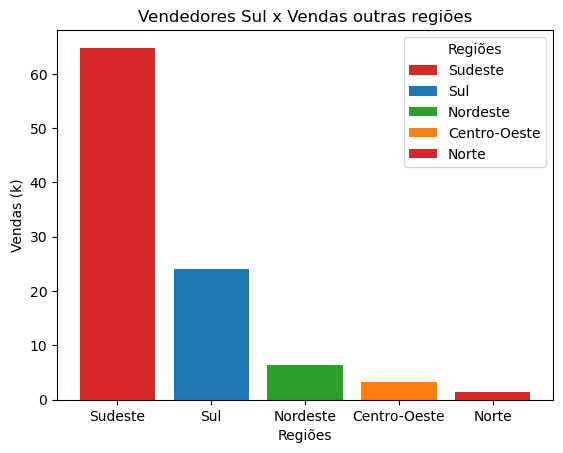

In [80]:
plot_bar(sul_compras.index, sul_compras['%'], 'Regiões', 'Vendas (k)', 'Vendedores Sul x Vendas outras regiões', 'Regiões')

In [81]:
cidades_sul = tabela_regioes_frete[['cidade_cliente', 'cidade_vendedor', 'regiao_cliente', 'regiao_vendedor', 'estado_cliente', 'estado_vendedor']]

In [82]:
reg_sul_vendedores = cidades_sul[cidades_sul['regiao_vendedor'] == 'Sul']
reg_sudoeste_compradores = reg_sul_vendedores[reg_sul_vendedores['regiao_cliente'] == 'Sudeste']

In [83]:
sul_v_reg = reg_sudoeste_compradores['estado_cliente'].value_counts().to_frame()
sul_v_reg['%'] = round(((sul_v_reg['count'] / 
                      sul_v_reg['count'].sum()) * 100),1)
sul_v_reg

,count,%
estado_cliente,,
SP,5995,60.3
RJ,2047,20.6
MG,1704,17.1
ES,203,2.0


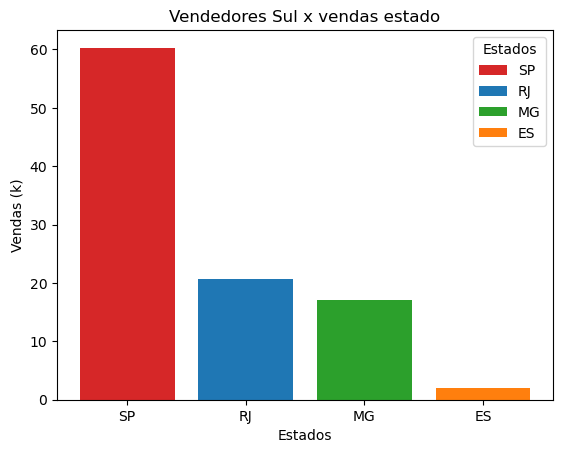

In [84]:
plot_bar(sul_v_reg.index, sul_v_reg['%'], 'Estados', 'Vendas (k)', 'Vendedores Sul x vendas estado', 'Estados')

In [85]:
regioes_mais_vendas = tabela_regioes_frete['regiao_vendedor'].value_counts().to_frame()
regioes_mais_vendas['%'] = round(((regioes_mais_vendas['count'] / 
                      regioes_mais_vendas['count'].sum()) * 100),1)
regioes_mais_vendas

,count,%
regiao_vendedor,,
Sudeste,99124,84.5
Sul,15662,13.3
Nordeste,1800,1.5
Centro-Oeste,757,0.6
Norte,26,0.0


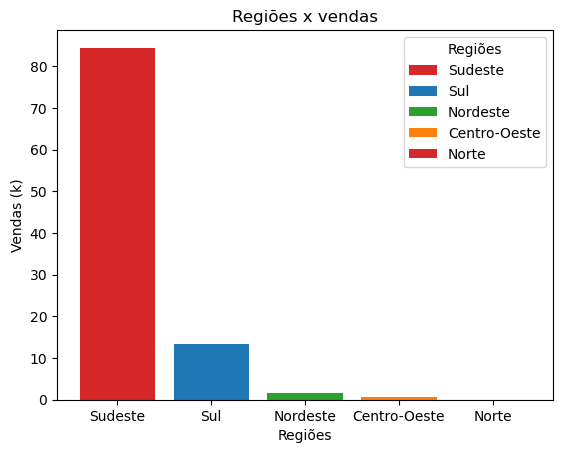

In [86]:
regioes_mais_vendas.index
plot_bar(regioes_mais_vendas.index, regioes_mais_vendas['%'], 'Regiões', 'Vendas (k)', 'Regiões x vendas', 'Regiões')

<h2 style='color:green' >Pergunta 9</h2>

<h3> Categoria </h3

In [87]:
categoria_nota = dados_selecionados.groupby('nome_categoria_produto')['nota_cliente'].agg(['count', 'mean']).reset_index()
categoria_nota.columns = ['nome_categoria_produto', 'numero_vendas', 'nota_media']
categoria_nota = categoria_nota.sort_values(by='numero_vendas', ascending=False).head(50).set_index('nome_categoria_produto')
categoria_nota.sort_values(by= 'nota_media', ascending=False).head(10)

,numero_vendas,nota_media
nome_categoria_produto,,
livros_interesse_geral,565,4.431858
livros_tecnicos,272,4.345588
alimentos_bebidas,291,4.312715
malas_acessorios,1163,4.290628
eletrodomesticos_2,271,4.202952
pet_shop,2030,4.188670
fashion_calcados,278,4.179856
papelaria,2625,4.176381
eletrodomesticos,826,4.163438


<h3> Produto</h3>

In [88]:
top_produtos = dados_selecionados.groupby('codigo_produto')['nota_cliente'].agg(['count', 'mean']).reset_index()
top_produtos.columns = ['codigo_produto', 'numero_vendas', 'nota_media']
top_produtos = top_produtos.sort_values(by='numero_vendas', ascending=False).head(100).set_index('codigo_produto')
top_produtos.sort_values(by= 'nota_media', ascending=False).head(10)

,numero_vendas,nota_media
codigo_produto,,
PROD25749,75,4.520000
PROD9215,140,4.478571
PROD12629,88,4.477273
PROD2359,110,4.427273
PROD20550,106,4.405660
PROD23118,116,4.362069
PROD15596,77,4.350649
PROD4582,92,4.347826
PROD3908,82,4.341463


<h3> Vendedor </h3>

In [89]:
vendedor_nota = dados_selecionados.groupby('codigo_vendedor')['nota_cliente'].agg(['count', 'mean']).reset_index()
vendedor_nota.columns = ['codigo_vendedor', 'numero_vendas', 'nota_media']
vendedor_nota = vendedor_nota.sort_values(by='numero_vendas', ascending=False).head(50).set_index('codigo_vendedor')
vendedor_nota.sort_values(by= 'nota_media', ascending=False).head(10)

,numero_vendas,nota_media
codigo_vendedor,,
VEND73,371,4.433962
VEND173,354,4.401130
VEND557,609,4.331691
VEND281,463,4.241901
VEND1684,458,4.231441
VEND2850,763,4.211009
VEND2207,1245,4.209639
VEND2001,551,4.190563
VEND1893,831,4.186522


<h2> Pergunta 10 </h2>

In [90]:
colunas_status = ['cod_cliente','product_id','seller_id','product_category_name','customer_state','total_produto_frete','price','order_status','payment_type','payment_value']
status = dados[colunas_status]
status

,cod_cliente,product_id,seller_id,product_category_name,customer_state,total_produto_frete,price,order_status,payment_type,payment_value
0,CLIENTE65557,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,cool_stuff,RJ,72.19,58.9,delivered,credit_card,72.19
1,CLIENTE80988,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,cool_stuff,GO,73.86,55.9,delivered,boleto,73.86
2,CLIENTE25492,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,cool_stuff,MG,83.23,64.9,delivered,credit_card,83.23
3,CLIENTE22915,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,cool_stuff,PR,75.07,58.9,delivered,credit_card,75.07
4,CLIENTE2591,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,cool_stuff,MG,72.19,58.9,delivered,credit_card,72.19
...,...,...,...,...,...,...,...,...,...,...
119146,CLIENTE24152,NaN,NaN,NaN,SP,NaN,NaN,unavailable,boleto,210.09
119147,CLIENTE93287,NaN,NaN,NaN,SP,NaN,NaN,canceled,voucher,63.89
119148,CLIENTE55235,NaN,NaN,NaN,SP,NaN,NaN,canceled,voucher,107.13
119149,CLIENTE51641,NaN,NaN,NaN,RJ,NaN,NaN,unavailable,credit_card,195.91


In [91]:
labels_status = {'cod_cliente': 'id_cliente', 'product_id': 'id_protudo','seller_id' : 'id_vendedor','product_category_name' : 'nome_categoria ','customer_state' : 'uf_vendedor', 'total_produto_frete' : 'frete', 'price' : 'valor_produto', 'order_status' : 'status_pedido', 'payment_type' : 'tipo_pagamento', 'payment_value' : 'valor_pagamento'}

In [92]:
status = status.rename(columns=labels)
status = status.rename(columns={'product_id': 'id_produto', 'seller_id': 'id_vendedor'})

In [93]:
status

,codigo_cliente,id_produto,id_vendedor,nome_categoria_produto,estado_cliente,total_produto_frete,preco,status_pedido,tipo_pagamento,valor_total_pagamento
0,CLIENTE65557,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,cool_stuff,RJ,72.19,58.9,delivered,credit_card,72.19
1,CLIENTE80988,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,cool_stuff,GO,73.86,55.9,delivered,boleto,73.86
2,CLIENTE25492,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,cool_stuff,MG,83.23,64.9,delivered,credit_card,83.23
3,CLIENTE22915,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,cool_stuff,PR,75.07,58.9,delivered,credit_card,75.07
4,CLIENTE2591,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,cool_stuff,MG,72.19,58.9,delivered,credit_card,72.19
...,...,...,...,...,...,...,...,...,...,...
119146,CLIENTE24152,NaN,NaN,NaN,SP,NaN,NaN,unavailable,boleto,210.09
119147,CLIENTE93287,NaN,NaN,NaN,SP,NaN,NaN,canceled,voucher,63.89
119148,CLIENTE55235,NaN,NaN,NaN,SP,NaN,NaN,canceled,voucher,107.13
119149,CLIENTE51641,NaN,NaN,NaN,RJ,NaN,NaN,unavailable,credit_card,195.91


In [94]:
status_cancelado = status[status['status_pedido'] == 'canceled']
status_cancelado

,codigo_cliente,id_produto,id_vendedor,nome_categoria_produto,estado_cliente,total_produto_frete,preco,status_pedido,tipo_pagamento,valor_total_pagamento
471,CLIENTE37873,7c4a8bec217df1de0df2b5aaf8175b65,7040e82f899a04d1b434b795a43b4617,audio,SP,27.68,19.90,canceled,boleto,27.68
644,CLIENTE9935,0f24b7516c5b67c9c686848db9759d88,7040e82f899a04d1b434b795a43b4617,brinquedos,SP,128.93,119.90,canceled,credit_card,257.86
645,CLIENTE9935,0f24b7516c5b67c9c686848db9759d88,7040e82f899a04d1b434b795a43b4617,brinquedos,SP,128.93,119.90,canceled,credit_card,257.86
658,CLIENTE65996,1ec5253cf0b6d3a31b822770cfa139b5,7040e82f899a04d1b434b795a43b4617,utilidades_domesticas,RJ,289.59,229.90,canceled,credit_card,289.59
762,CLIENTE60640,2dc0d95288983b8c91627bab326284ae,a416b6a846a11724393025641d4edd5e,beleza_saude,SP,110.32,96.35,canceled,credit_card,110.32
...,...,...,...,...,...,...,...,...,...,...
119131,CLIENTE79434,NaN,NaN,NaN,ES,NaN,NaN,canceled,credit_card,157.13
119136,CLIENTE24311,NaN,NaN,NaN,SP,NaN,NaN,canceled,credit_card,280.20
119141,CLIENTE40129,NaN,NaN,NaN,SP,NaN,NaN,canceled,voucher,54.42
119147,CLIENTE93287,NaN,NaN,NaN,SP,NaN,NaN,canceled,voucher,63.89


<h3> Tipo de pagamento </h3>

In [108]:
status_cancelado['tipo_pagamento'].value_counts()

tipo_pagamento
credit_card    513
voucher        115
boleto         112
debit_card       7
not_defined      3
Name: count, dtype: int64

In [109]:
status_cancelado.shape

(750, 10)

<h3> Valor </h3>

In [135]:
status_cancelado1 = status_cancelado[status_cancelado['preco'] <= 50].shape
print(f'Compras com valores abaixo de 50 reais canceladas foi de {status_cancelado1[0]}')
status_cancelado2 = status_cancelado[(status_cancelado['preco'] >= 50) & (status_cancelado['preco'] < 150)].shape
print(f'Compras com valores acima de 50 e até 150  reais canceladas foi de {status_cancelado2[0]}')
status_cancelado3 = status_cancelado[(status_cancelado['preco'] >= 150) & (status_cancelado['preco'] < 300)].shape
print(f'Compras com valores acima de 150 e até 300 reais canceladas foi de {status_cancelado3[0]}')
status_cancelado4 = status_cancelado[(status_cancelado['preco'] >= 300)].shape
print(f'Compras com valores acima de 300 reais canceladas foi de {status_cancelado4[0]}')


Compras com valores abaixo de 50 reais canceladas foi de 187
Compras com valores acima de 50 e até 150  reais canceladas foi de 223
Compras com valores acima de 150 e até 300 reais canceladas foi de 92
Compras com valores acima de 300 reais canceladas foi de 69


<h3> Estado </h3>

In [132]:
status_cancelado['estado_cliente'].value_counts()

estado_cliente
SP    402
RJ     96
MG     75
RS     33
PR     29
SC     21
BA     17
GO     15
ES     12
DF     11
CE      7
PE      5
PI      5
MA      4
PA      4
RO      3
PB      3
MS      2
MT      2
SE      1
RR      1
TO      1
AL      1
Name: count, dtype: int64

<h3> Frete </h3>

In [136]:
status_cancelado5 = status_cancelado[status_cancelado['total_produto_frete'] <= 50].shape
print(f'Compras com o frete baixo de 50 reais canceladas foi de {status_cancelado5[0]}')
status_cancelado6 = status_cancelado[(status_cancelado['total_produto_frete'] >= 50) & (status_cancelado['preco'] < 150)].shape
print(f'Compras com o frete acima de 50 e até reais  canceladas foi de {status_cancelado6[0]}')
status_cancelado7 = status_cancelado[(status_cancelado['total_produto_frete'] >= 150) & (status_cancelado['preco'] < 300)].shape
print(f'Compras com o frete acima de 150 e até 300 reais canceladas foi de {status_cancelado7[0]}')
status_cancelado8 = status_cancelado[(status_cancelado['total_produto_frete'] >= 300)].shape
print(f'Compras com o frete acima de 300 reais canceladas foi de {status_cancelado8[0]}')

Compras com o frete baixo de 50 reais canceladas foi de 136
Compras com o frete acima de 50 e até reais  canceladas foi de 273
Compras com o frete acima de 150 e até 300 reais canceladas foi de 131
Compras com o frete acima de 300 reais canceladas foi de 80


<h2 style='color:green' >Pergunta 11- Análise do melhor comprador (items comprados e valor).</h2>

In [97]:
colunas = ['cod_pedido','order_item_id', 'cod_produto', 'product_category_name','product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'cod_vendedor', 'cod_cliente', 'order_status', 'price', 'freight_value', 'payment_type', 'payment_value', 'customer_city', 'customer_state', 'seller_city', 'seller_state','order_purchase_timestamp' ,'shipping_limit_date', 'order_estimated_delivery_date', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'review_score']
dados_selecionados = dados[colunas]
dados_selecionados.head()

,cod_pedido,order_item_id,cod_produto,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,cod_vendedor,...,customer_city,customer_state,seller_city,seller_state,order_purchase_timestamp,shipping_limit_date,order_estimated_delivery_date,order_delivered_carrier_date,order_delivered_customer_date,review_score
0,PED0,1.0,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,...,campos dos goytacazes,RJ,volta redonda,SP,2017-09-13 08:59:02,2017-09-19 09:45:35,2017-09-29 00:00:00,2017-09-19 18:34:16,2017-09-20 23:43:48,5
1,PED7352,1.0,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,...,jatai,GO,volta redonda,SP,2017-06-28 11:52:20,2017-07-05 02:44:11,2017-07-26 00:00:00,2017-07-05 12:00:33,2017-07-13 20:39:29,5
2,PED32057,1.0,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,...,belo horizonte,MG,volta redonda,SP,2018-05-18 10:25:53,2018-05-23 10:56:25,2018-06-07 00:00:00,2018-05-23 14:05:00,2018-06-04 18:34:26,4
3,PED42988,1.0,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,...,sao jose dos pinhais,PR,volta redonda,SP,2017-08-01 18:38:42,2017-08-07 18:55:08,2017-08-25 00:00:00,2017-08-02 19:07:36,2017-08-09 21:26:33,5
4,PED48148,1.0,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,...,conselheiro lafaiete,MG,volta redonda,SP,2017-08-10 21:48:40,2017-08-16 22:05:11,2017-09-01 00:00:00,2017-08-11 19:43:07,2017-08-24 20:04:21,5


In [98]:
melhor_cliente = dados_selecionados['cod_cliente'].value_counts().to_frame().head(1)
melhor_cliente.iloc[0].to_frame()

,CLIENTE18704
count,63


In [99]:
melhor_cliente_df = dados_selecionados[dados_selecionados['cod_cliente'] == 'CLIENTE18704' ]
melhor_cliente_df['price'].sum()

2305.3800000000006

In [100]:
vendas_por_cliente = dados_selecionados[['cod_cliente', 'price']].groupby('cod_cliente').sum()
melhor_comprador = vendas_por_cliente.sort_values(by='price', ascending=False).head(1)
melhor_comprador

,price
cod_cliente,
CLIENTE6195,13440.0


In [101]:
print('Cliente com mais compras no site:', melhor_cliente.iloc[0].to_frame().columns[0], 'Total de compras:', melhor_cliente.iloc[0].to_frame().values[0][0])
print('Cliente que mais gastou no site:',melhor_comprador.iloc[0].to_frame().values[0][0] , 'Total gasto R$:', melhor_comprador.iloc[0].to_frame().columns[0] )

Cliente com mais compras no site: CLIENTE18704 Total de compras: 63
Cliente que mais gastou no site: 13440.0 Total gasto R$: CLIENTE6195


In [102]:
melhor_cliente.iloc[0].to_frame().values[0][0]

63

In [103]:
df_melhor = dados_selecionados[dados_selecionados['cod_cliente'] == 'CLIENTE6195']
colunas = ['cod_pedido','order_item_id', 'cod_produto', 'product_category_name','product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'cod_vendedor', 'cod_cliente', 'order_status', 'price', 'freight_value', 'payment_type', 'payment_value', 'customer_city', 'customer_state', 'seller_city', 'seller_state','order_purchase_timestamp' ,'shipping_limit_date', 'order_estimated_delivery_date', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'review_score']
dados_selecionados = dados[colunas]
dados_selecionados = dados_selecionados.drop_duplicates()
dados_selecionados = dados_selecionados.dropna(subset=['cod_produto'])


In [104]:
dados_selecionados

,cod_pedido,order_item_id,cod_produto,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,cod_vendedor,...,customer_city,customer_state,seller_city,seller_state,order_purchase_timestamp,shipping_limit_date,order_estimated_delivery_date,order_delivered_carrier_date,order_delivered_customer_date,review_score
0,PED0,1.0,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,...,campos dos goytacazes,RJ,volta redonda,SP,2017-09-13 08:59:02,2017-09-19 09:45:35,2017-09-29 00:00:00,2017-09-19 18:34:16,2017-09-20 23:43:48,5
1,PED7352,1.0,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,...,jatai,GO,volta redonda,SP,2017-06-28 11:52:20,2017-07-05 02:44:11,2017-07-26 00:00:00,2017-07-05 12:00:33,2017-07-13 20:39:29,5
2,PED32057,1.0,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,...,belo horizonte,MG,volta redonda,SP,2018-05-18 10:25:53,2018-05-23 10:56:25,2018-06-07 00:00:00,2018-05-23 14:05:00,2018-06-04 18:34:26,4
3,PED42988,1.0,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,...,sao jose dos pinhais,PR,volta redonda,SP,2017-08-01 18:38:42,2017-08-07 18:55:08,2017-08-25 00:00:00,2017-08-02 19:07:36,2017-08-09 21:26:33,5
4,PED48148,1.0,PROD25865,cool_stuff,4.0,650.0,28.0,9.0,14.0,VEND513,...,conselheiro lafaiete,MG,volta redonda,SP,2017-08-10 21:48:40,2017-08-16 22:05:11,2017-09-01 00:00:00,2017-08-11 19:43:07,2017-08-24 20:04:21,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118313,PED97807,1.0,PROD12741,moveis_decoracao,2.0,1000.0,69.0,11.0,11.0,VEND1817,...,rio de janeiro,RJ,curitiba,PR,2017-04-19 10:20:51,2017-04-27 05:10:28,2017-05-22 00:00:00,2017-05-04 15:06:24,2017-05-24 10:52:43,4
118314,PED98085,1.0,PROD9858,eletronicos,3.0,500.0,17.0,9.0,25.0,VEND2705,...,limeira,SP,curitiba,PR,2017-08-11 10:15:22,2017-08-17 02:55:27,2017-09-04 00:00:00,2017-08-14 22:03:19,2017-08-17 17:47:55,4
118315,PED98298,1.0,PROD21768,pcs,4.0,5660.0,54.0,18.0,47.0,VEND2916,...,vitoria,ES,londrina,PR,2018-07-25 18:10:17,2018-08-02 04:05:13,2018-08-10 00:00:00,2018-08-03 14:42:00,2018-08-15 14:57:50,1
118316,PED98461,1.0,PROD10190,bebidas,1.0,2000.0,19.0,38.0,19.0,VEND2507,...,cacapava,SP,sao paulo,SP,2018-04-12 19:47:40,2018-04-18 20:10:33,2018-04-30 00:00:00,2018-04-18 00:41:29,2018-04-20 17:48:39,5


<h2 style='color:green' >Pergunta 11- Fazer categorias para os melhores compradores.</h2>